# LDDS

# Dynamics using Potential Energy Surface (PES) data

So far, we have dealt with analytical models of the dynamics of systems that can relate to realistic systems. 

However, for more realistic dynamical systems, it is not always possible to have an analytical expression for the Potential Energy Surface (PES) where the dynamics take place. 

Instead, energy measurements from a sampled portion of a parameter space may be only available.

In this tutorial, we will illustrate the setup for computing the LDs for the dynamics of a system where the PES is only available as a dataset. We will deal with a discretised version of the PES of the Hénon-Heiles system, that we studied in [Tutorial 5](tutorial-5.ipynb).

# Discretised Hénon-Heiles

_Energy_

\begin{equation*}
H(x, p_x) = K + V = \frac{1}{2} (p_x^2 + p_y^2) + \frac{1}{2} (x^2 + y^2) + x^2 y - \frac{1}{3} y^3
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} =  p_x \\
 \dot{y} &= \frac{\partial H}{\partial p_y} = p_y  \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} =  -x - 2 x y \\
 \dot{p}_y &= -\frac{\partial H}{\partial y} =  -x^2 -y + y^2 \\
 \end{align*}

As before, we call all the necessary functions first

In [9]:
import os, sys
import numpy as np
sys.path.insert(1, os.pardir)
from ldds.base import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds
from ldds.vector_fields import HenonHeiles_vector_field
from ldds.hamiltonians import HenonHeiles_potential

For this example, we sampled potential energy data using its analytical expression to illustrate the LDDS setup. Then, we compare the LD outputs from when analytical or the numerical inputs of the potential energy are employed. 

We sampled the potential energy from a uniform grid in the $XY$ plane, and save this as a datafile.

In [10]:
from ldds.testing_scripts import generate_pes_data

In [11]:
n=100
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)

filename = "HenonHeiles_pes_data" # HDF5 output filename
generate_pes_data([x,y], HenonHeiles_potential, filename) # Saved in ldds/pes_files

Once the file is generated, the LDDS setup proceeds as usual for any system.

__BUT__ with the difference that the `potential_energy` is defined as below.

In [12]:
from ldds.base import fit_pes

In [13]:
filename = "HenonHeiles_pes_data"
potential_energy = fit_pes(filename)

The function `fit_pes` will fit the PES dataset provided its filename, outputing a Python function. Currently, only possible for HDF5 files. 
This function will take by default files from the folder `ldds/pes_files`

> See `help(fit_pes)` for details of the fitting method or check the documentation. 

Then, we execute the cells below as before, for a high-dimensional system as in [Tutorial 5](tutorial-5.ipynb).

And we're done!

In [14]:
# Integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = 1/5 # Energy

ax1_min,ax1_max = [-0.6, 1.2]
ax2_min,ax2_max = [-0.65, 0.65]
N1, N2 = [300, 300]

# Box escape condition
box_boundaries = [[-5, 5], [-5, 5]]

# Miscellaneous grid parameters
dims_fixed = [1,0,0,0] # Variable ordering (x1 x2 y1 y2)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [0,1,0,1] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [15]:
vector_field = HenonHeiles_vector_field

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : dims_fixed,
        'dims_fixed_values' : dims_fixed_values,
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [16]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

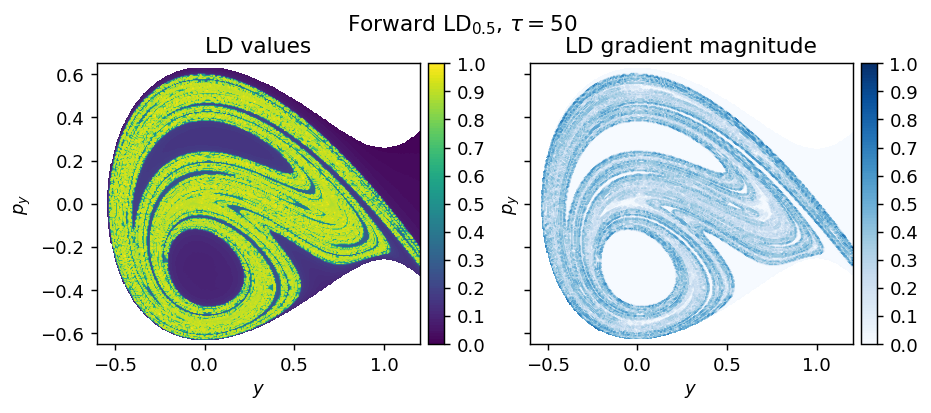

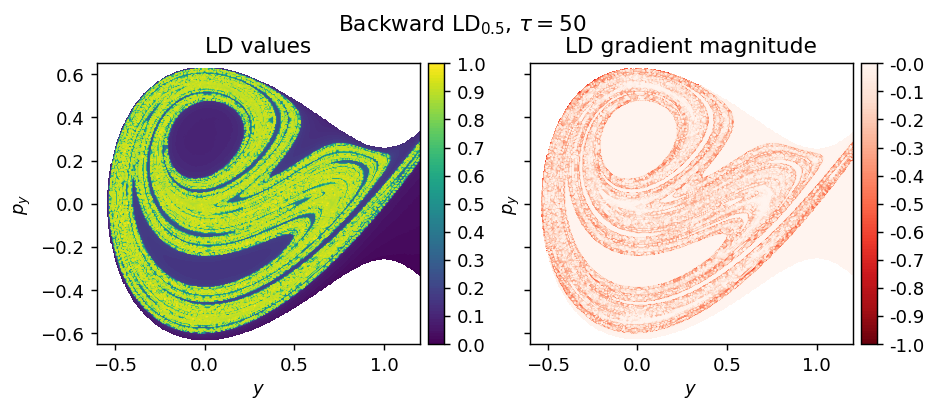

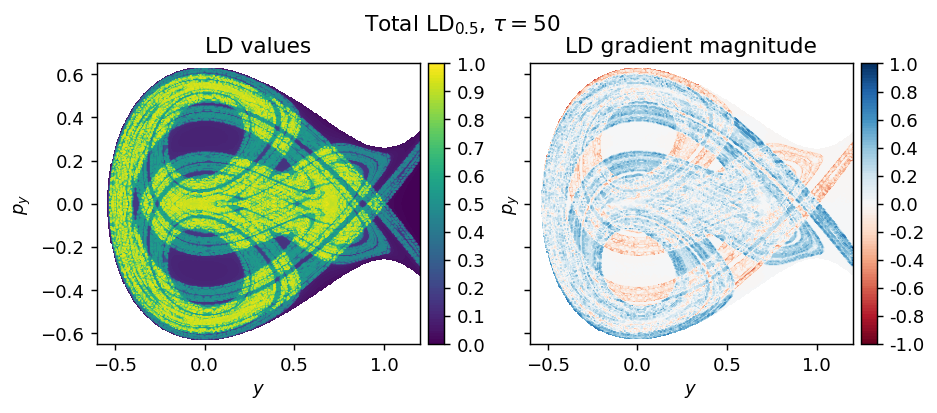

In [17]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)